# Кластерный анализ
## Метод к-средних



Дана матрица данных $X$ и дано число $k$ предполагаемых кластеров. Цель кластеризации представить данные в виде групп кластеров $C=\{C_1, C_2, \ldots, C_k\}$. Каждый кластер имеет свой центр:

\begin{equation}
\mu_i = \frac{1}{n_i} \sum \limits_{x_j \in C_i} x_j
\end{equation}

где $n_i = |C_i|$ - это количество точек в кластере $C_i$.

Таким образом, мы имеем некоторые кластеры $C=\{C_1, C_2, \ldots, C_k\}$ и необходимо оценить качество разбиения. Для этого будем вычислять сумму квадратических ошибок (SSE):

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

Цель найти
\begin{equation}
C^* = arg\min\limits_C \{SSE(C)\}
\end{equation}

### Алгоритм к-средних
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:
1. t = 0
2. случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;
3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$
11. пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

## Задание
1. Написать программу, реализующую алгоритм к-средних.
2. Визуализировать сходимость центров кластеров.
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

In [2]:
from sklearn.metrics import normalized_mutual_info_score as nmi_score

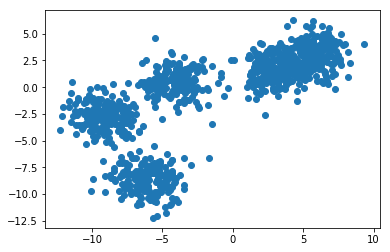

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
#X.sort()
plt.scatter(X[:,0], X[:,1])

In [4]:
class Kmeans:
    def __init__(self,k,stop):
        self.k = k
        self.stop = stop
        
        
    #теорема Пифагора на максималках
    def _evklid_metric(self,p,q):
        try:
            len(p)
        except TypeError:
            p, q = np.array([p]), np.array([q])
        return np.sum([ ( p[i] - q[i])**2 for i in range(0,len(q)) ])**0.5  

    #индексы первых кластеров случайно
    def _sample_index(self,length,batch_size):
        ololo = list(set(np.random.choice(np.arange(length),batch_size)))
        while len(ololo) != batch_size:
            new_ind = np.random.randint(length)
            if not(new_ind in ololo): 
                ololo.append(new_ind)
        ololo.sort()
        return ololo    
      
    #измеряем расстояние от точек до центров кластеров и относим их кластерам
    def _assign_cluster(self,X,k_centers):
        for j, x_point in enumerate(X[:,:-1]):
            k_x = -1
            dist = np.inf
            for i, center_point in enumerate(k_centers):
                metr = self._evklid_metric(center_point, x_point)
                if metr < dist:
                    k_x = i
                    dist = metr
            X[j][-1] = k_x
        return X
    
    def _assign_cluster_pred(self,X,k_centers):
        Y = []
        for x_point in X:
            k_x = -1
            dist = np.inf
            for i, center_point in enumerate(k_centers):
                metr = self._evklid_metric(center_point, x_point)
                if metr < dist:
                    k_x = i
                    dist = metr
            Y.append(k_x)
        return np.array(Y)
    
        
    def fit(self,X):
        k_centers = X[self._sample_index(len(X),self.k)]
        E = np.mean(k_centers , axis = 1)
        #добавляем новый столбец для меток кластеров
        X = np.hstack((X,-np.ones(len(X)).reshape(-1,1)))
        i = 0
        while True:       
            i += 1
            X = self._assign_cluster(X,k_centers)
            k_centers = np.array([np.mean(X[X[:,-1] == i][:,:-1],axis = 0 ) for i in range(self.k)])
            new_E = np.mean(k_centers , axis = 1)
            if sum((E-new_E)**2) < self.stop:
                print(f'iterarions: {i}')
                self.k_centers = k_centers
                break
            E = new_E
    
    def train(self,X):
        self.fit(X)
        X = np.hstack((X,-np.ones(len(X)).reshape(-1,1)))
        return self._assign_cluster(X, self.k_centers)
    
            
    def fit_predict(self,X):
        self.fit(X)
        return self.predict(X)
        
    def predict(self, X):
        try:
            return self._assign_cluster_pred(X.copy(), self.k_centers) 
        except AttributeError :
            print('Not trained model!')      

In [5]:
kmeans = Kmeans(4,0.1)

In [6]:
kmeans.fit(X)

iterarions: 5


In [7]:
clastered_Y = kmeans.predict(X)

In [8]:
nmi_score(Y,clastered_Y)

0.8940244105114922

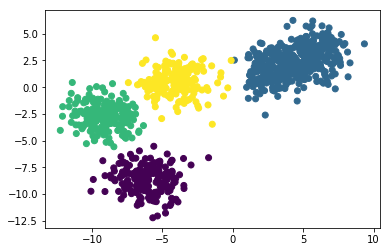

In [9]:
plt.scatter(X[:,0], X[:,1], c = clastered_Y)
plt.show()